# 🔊 Audio Classification using Tensorflow: CapuchinBird Audion counts

This project is a part of video `Build a Deep Audio Classifier by Nicolas` [link](https://youtu.be/ZLIPkmmDJAc)

In this project we are going to Create a Deep Audio Classifier which should be able to Classify between the voice of `CapuchinBird` and `Not CapuchinBird`. And after that we are going to use the model on Bunch of audio Files to Count the number of CapuchinBird's Voice in that full video This is going to be an Interesting project.

### The Dataset for this is Available on Kaggle [Z by HP Unlocked Challenge 3](https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing)

I have downloaded The dataset for this(Saved on My Google drive) and Firstly we need to Extract that zip file from here to our desired place

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip the archive file to get Started
#!unzip "drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/archive.zip" -d "drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/"

Archive:  drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/archive.zip
  inflating: drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Forest Recordings/recording_00.mp3  
  inflating: drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Forest Recordings/recording_01.mp3  
  inflating: drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Forest Recordings/recording_02.mp3  
  inflating: drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Forest Recordings/recording_03.mp3  
  inflating: drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Forest Recordings/recording_04.mp3  
  inflating: drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Forest Recordings/recording_05.mp3  
  inflating: drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Forest Recordings/recording_06.mp3  
  inflating: driv

In [2]:
# Let's walk thorugh this data to see how file are Stored
import os

DATA_PATH = "drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data"
for dirpath, dirnames, filenames in os.walk(DATA_PATH):
  print(f"Dataset have {len(dirnames)} directories and {len(filenames)} Files at '{dirpath}'")

Dataset have 3 directories and 0 Files at 'drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data'
Dataset have 0 directories and 100 Files at 'drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Forest Recordings'
Dataset have 0 directories and 217 Files at 'drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Parsed_Capuchinbird_Clips'
Dataset have 0 directories and 593 Files at 'drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Parsed_Not_Capuchinbird_Clips'


In [3]:
# Installing some dependencies
!pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 39.4 MB/s eta 0:00:00


In [4]:
# Importing Dependencies

import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

## 2. Build Data Loading Function

Here we will try to load the audio files and try to convert them into `waveforms` Which we can Visualize and HopeFully be above to Hear that one

### 2.1 Define paths to files for specific random file

In [5]:
import random
#file with Capuchin Bird
CAPUCHIN_FILE = os.path.join(DATA_PATH, "Parsed_Capuchinbird_Clips",
                             random.sample(os.listdir(os.path.join(DATA_PATH, "Parsed_Capuchinbird_Clips")),1)[0])

# Not Capuchin Bird
NOT_CAPUCHIN_FILE = os.path.join(DATA_PATH, "Parsed_Not_Capuchinbird_Clips",
                                 random.sample(os.listdir(os.path.join(DATA_PATH, "Parsed_Not_Capuchinbird_Clips")),1)[0])

print("Path of Capuchin file: ", CAPUCHIN_FILE)
print("Path of Not Capuchin file: ", NOT_CAPUCHIN_FILE)

Path of Capuchin file:  drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Parsed_Capuchinbird_Clips/XC433953-1.wav
Path of Not Capuchin file:  drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Parsed_Not_Capuchinbird_Clips/bobwhite-quail-sound-2.wav


### 2.2 Build Dataloading Function

In [6]:
def load_wav_16k_mono(filename):
  """
  Load audio of single Channel means mono channel at 16Khz
  """
  # Load encoded wav file
  file_contents = tf.io.read_file(filename)
  # Decode wav (tensor by channels) using single channel (instead of sterio we are using mono)
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels = 1)
  # Removes trailing axis
  wav = tf.squeeze(wav, axis = -1) # wav file from above has the shape of (132300,1) we want to squeeze it to (132300) only
  sample_rate = tf.cast(sample_rate , dtype = tf.int64)
  # we have sample rate of 44100HZ we want 16000Hz - amplitude of the audio signal
  wav = tfio.audio.resample(wav, rate_in = sample_rate, rate_out = 16000)# less data to process

  return wav

### 2.3 Plot Wave

In [7]:

wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

wave, nwave

(<tf.Tensor: shape=(48000,), dtype=float32, numpy=
 array([-8.5810979e-07,  6.2254521e-06, -2.7709737e-06, ...,
         2.6350290e-02,  5.3721674e-02,  6.9443032e-02], dtype=float32)>,
 <tf.Tensor: shape=(50128,), dtype=float32, numpy=
 array([ 3.2084468e-08, -1.1666012e-07,  4.9569508e-07, ...,
        -8.2656490e-03, -4.1847778e-03, -1.8170770e-02], dtype=float32)>)

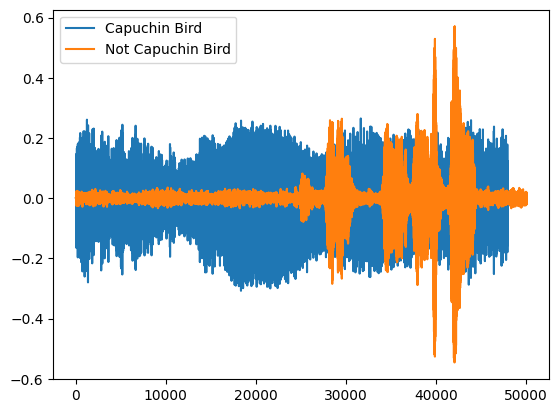

In [8]:
# lets plot them
plt.plot(wave, label = "Capuchin Bird")
plt.plot(nwave, label = "Not Capuchin Bird")
plt.legend()
plt.show()

In [9]:
# let's hear how they sounds
from IPython.display import Audio

print("\tSound of a Capuchin Bird: ")
Audio(wave, rate = 16000)

	Sound of a Capuchin Bird: 


In [10]:
print("\tSound of a Non Capuchin Bird: ")
Audio(nwave, rate = 16000)

	Sound of a Non Capuchin Bird: 


## Next big task - **Convert the Waveform to an Spectogram**

you might be thinking What is Spectogram

*A spectogram in normal language is a image representation of an Audio Waveform So that we can use the Image Classification techniques for our audio files*

but Before that Let's load all the data into notebook

# 3. Create TensorFlow Dataset

### 3.1 Define Paths to positive and negative data

In [11]:
POS = os.path.join(DATA_PATH, "Parsed_Capuchinbird_Clips")
NEG = os.path.join(DATA_PATH, "Parsed_Not_Capuchinbird_Clips")

POS, NEG

('drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Parsed_Capuchinbird_Clips',
 'drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Parsed_Not_Capuchinbird_Clips')

### 3.2 Create Tensorflow Dataset

For this we are going to use `tf.data.Dataset.list_files()` methods this is going to give as a set of files as a `string paths` inside of a Tensorflow Dataset format that we will be above to preprocess them and Load them up

In [12]:
pos = tf.data.Dataset.list_files(POS + '/*.wav')
neg = tf.data.Dataset.list_files(NEG + '/*.wav')

In [13]:

pos.as_numpy_iterator().next()

b'drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Parsed_Capuchinbird_Clips/XC16803-1.wav'

In [14]:
pos

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

**From above we can see that tf.data.Dataset.list_files methods has created a list of file paths in an Tensorflow.data.Dataset format**

It Automatically shuffles all the files

### 3.3 Add labels and Combine positive and Negative Samples

In [15]:
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [16]:
tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>

In [17]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

data = positives.concatenate(negatives)

In [18]:
positives.as_numpy_iterator().next()

(b'drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Parsed_Capuchinbird_Clips/XC79965-2.wav',
 1.0)

As we can see now we have file path with there respective labels

In [19]:
# Let's as what .concatenate has does
len(positives), len(negatives), len(data)

(217, 593, 810)

In [20]:
data.shuffle(len(data)).as_numpy_iterator().next()

(b'drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Parsed_Not_Capuchinbird_Clips/curlew-sound-0.wav',
 0.0)

means now we have a dataset which has both negatives and positives stack on to top of each other in an same dataset with there respective label

## 4. Determine Average length of a Capuchin Call

### 4.1 Calculate Wave Cycle length of CapuchinBird call

In [21]:
lengths = []
for filename in os.listdir(os.path.join(DATA_PATH, 'Parsed_Capuchinbird_Clips')):
  wave = load_wav_16k_mono(os.path.join(DATA_PATH, 'Parsed_Capuchinbird_Clips', filename))
  lengths.append(len(wave))

In [22]:
lengths[:10]

[48000, 40000, 56000, 48000, 64000, 64000, 64000, 56000, 56000, 56000]

### 4.2 Calculate Max, Min and Max

In [22]:
#mean value
mean = tf.math.reduce_mean(lengths).numpy()
mean

54156

In [23]:
#Min value
min = tf.math.reduce_min(lengths).numpy()
min

32000

In [24]:
#Max value
max = tf.math.reduce_max(lengths).numpy()
max

80000

In [25]:
import numpy as np
lengths.sort()
median = lengths[len(lengths)//2]
median

56000

In [26]:
RATE = 16000
print(f"Average length of an Clip in CapuchinBird call: {mean/RATE :.2f}s")
print(f"Maximum length of an Clip in CapuchinBird call: {max/RATE}s")
print(f"Minimum length of an Clip in CapuchinBird call: {min/RATE}s")

Average length of an Clip in CapuchinBird call: 3.38s
Maximum length of an Clip in CapuchinBird call: 5.0s
Minimum length of an Clip in CapuchinBird call: 2.0s


## 5. Build Preprocessing Function to convert to Spectrogram

### 5.1 Build the Preprocessing Function

In [23]:
def preprocess(file_path, label): # having label as a parameter here help us using map function on our data which is a collection of filepaths and label
  #Load file as waveform
  wav = load_wav_16k_mono(file_path)

  # just trying to capture all of the audio
  wav = wav[:48000]

  # all of file are not gonna met 48000 amplitude limit so we add zeros at start as padding
  zero_padding = tf.zeros([48000] - tf.shape(wav), dtype = tf.float32)

  # Concatinating zero at start
  wav = tf.concat([zero_padding, wav],0)

  # this gives as a short time fourier Transform
  spectrogram = tf.signal.stft(wav, frame_length = 320, frame_step = 32)

  # convert to absolute form
  spectrogram = tf.abs(spectrogram)

  #Expand dims to add channel (mono audio) 1
  spectrogram = tf.expand_dims(spectrogram, axis = 2)

  return spectrogram, label

### 5.2 Test out the Function and Visualize the Spectrogram

In [24]:
filepath, label = positives.shuffle(buffer_size = len(positives)).as_numpy_iterator().next()
filepath, label

(b'drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Parsed_Capuchinbird_Clips/XC178168-4.wav',
 1.0)

In [25]:
spectrogram, label = preprocess(filepath, label)

In [26]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[1.44320000e-02],
        [6.60651699e-02],
        [6.45699054e-02],
        ...,
        [1.41545504e-04],
        [6.89574372e-05],
        [2.45217234e-05]],

       [[7.58944973e-02],
        [8.46930295e-02],
        [6.81754872e-02],
        ...,
        [1.62525233e-04],
        [8.08838668e-05],
        [3.50996852e-05]],

       [[1.32957637e-01],
        [1.19470455e-01],
        [7.53680691e-02],
        ...,
        [1.70620828e-04],
        [6.62250313e-05],
        [5.87180257e-05]],

       ...,

       [[8.45726728e-02],
        [6.40981421e-02],
        [2.92681605e-02],
        ...,
        [2.55468534e-04],
        [1.68859900e-04],
        [1.03827566e-04]],

       [[7.06437379e-02],
        [5.02377003e-02],
        [1.35993417e-02],
        ...,
        [2.20338959e-04],
        [1.47479906e-04],
        [8.72164892e-05]],

       [[6.51364028e-02],
        [4.58923392e-02],
        [1.06409974e-02]

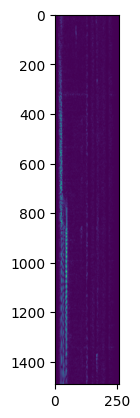

In [27]:
plt.imshow(spectrogram);

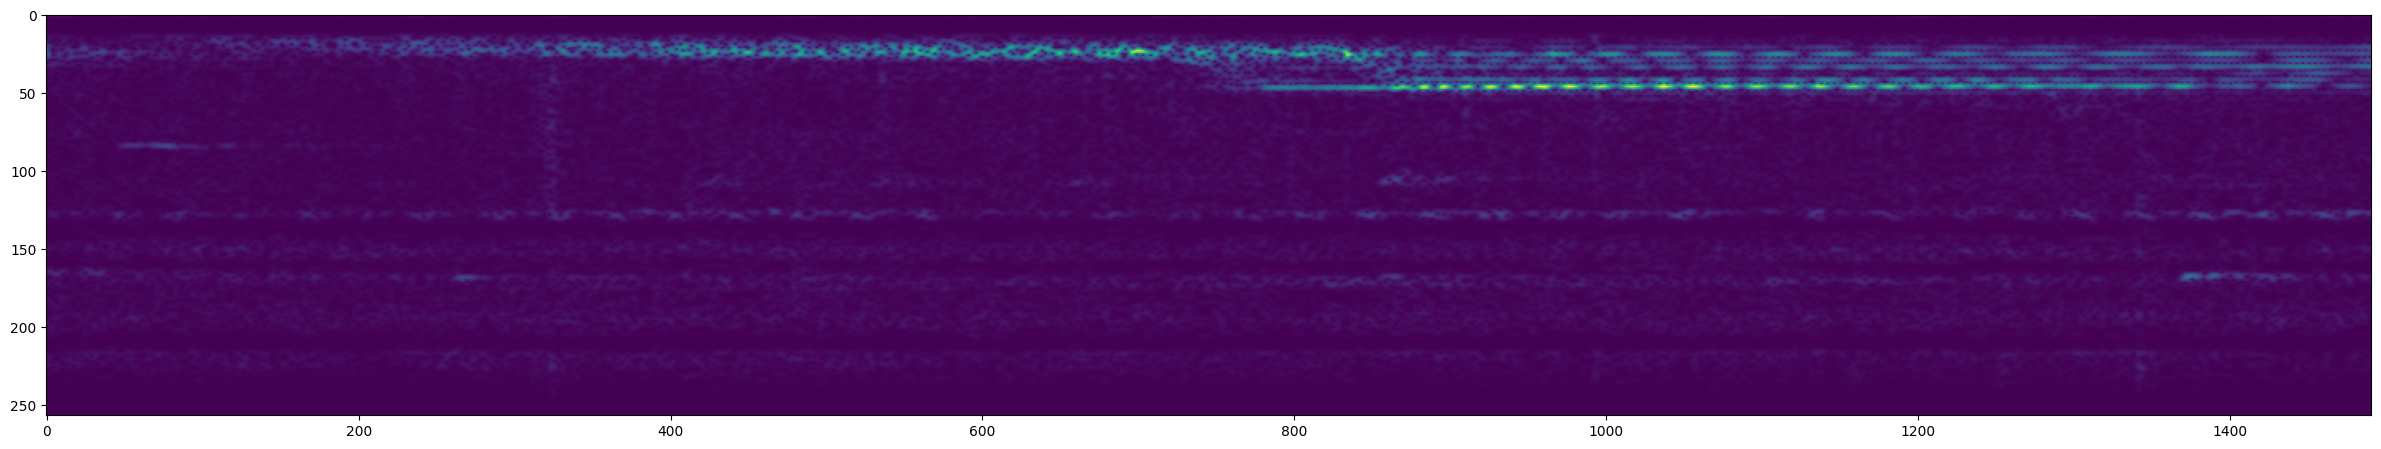

In [28]:
plt.figure(figsize = (30, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [29]:
# Let see for negatives also
filepath, label = negatives.shuffle(len(negatives)).as_numpy_iterator().next()
filepath,label

(b'drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data/Parsed_Not_Capuchinbird_Clips/sparrow-sound-effect-20.wav',
 0.0)

In [30]:
spectrogram, label = preprocess(filepath,label)
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[3.5274941e-03],
        [6.5587540e-03],
        [8.4076440e-03],
        ...,
        [5.5441747e-06],
        [3.9516895e-06],
        [1.0598451e-06]],

       [[3.2352656e-04],
        [4.0727076e-03],
        [6.6689006e-03],
        ...,
        [8.8361384e-07],
        [2.7630833e-06],
        [6.7427754e-06]],

       [[3.2439623e-03],
        [3.4530556e-03],
        [4.0927175e-03],
        ...,
        [7.3732367e-06],
        [9.8368753e-07],
        [2.4493784e-06]],

       ...,

       [[6.5564401e-03],
        [7.1861083e-03],
        [4.9177008e-03],
        ...,
        [3.1702384e-05],
        [1.3044293e-05],
        [6.4447522e-07]],

       [[8.3598746e-03],
        [7.9817697e-03],
        [6.5797539e-03],
        ...,
        [2.7317652e-05],
        [1.7757859e-05],
        [3.9292499e-06]],

       [[6.3263550e-03],
        [8.0184983e-03],
        [9.2779407e-03],
        ...,
        [2.4912712

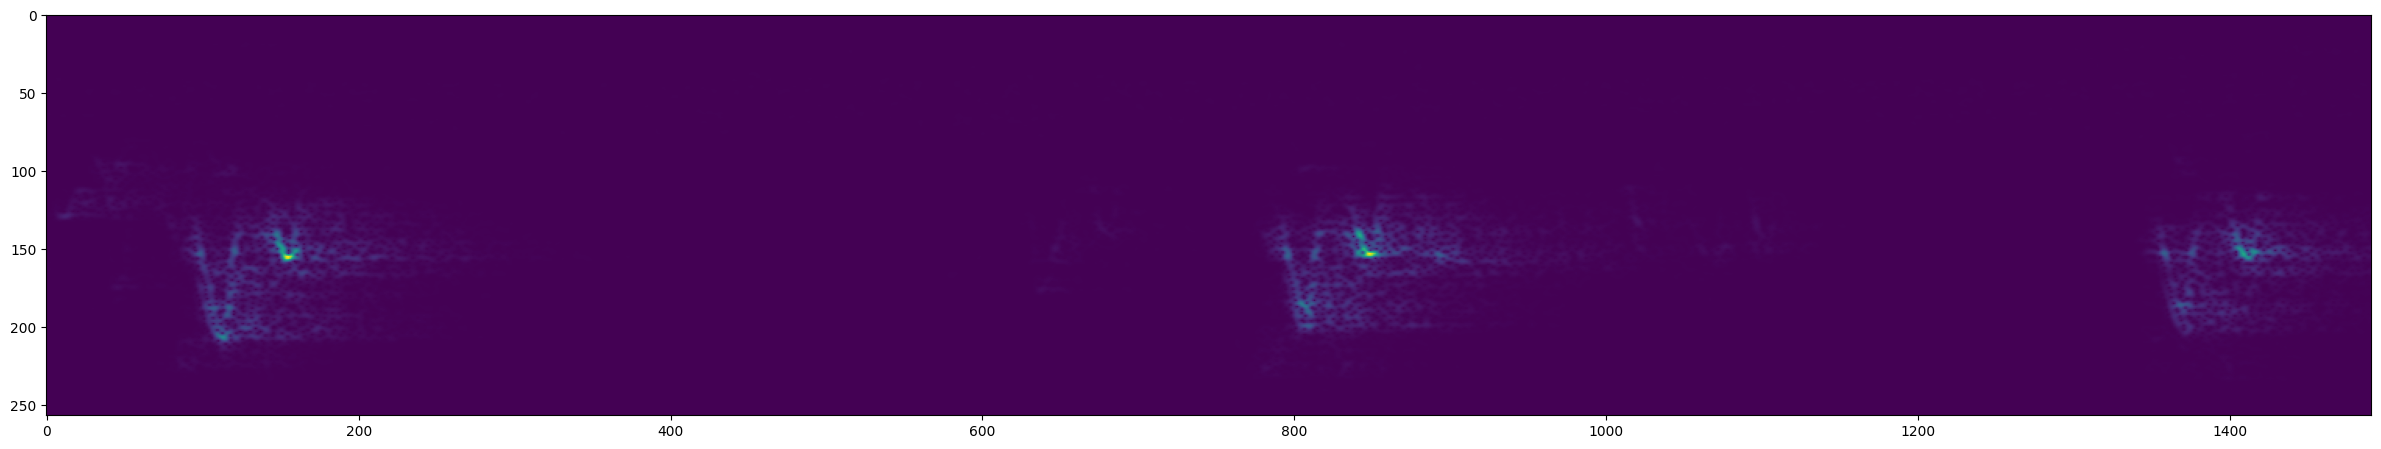

In [31]:
plt.figure(figsize = (30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

## 6. Create training and testing partitions

### 6.1 Create a TensorFlow Data pipeline

In [32]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

### 6.2 Split into training and testing partitions

In [35]:
import numpy as np
len(data) - np.round(len(data)* .7)

15.0

In [36]:
Take = np.round(len(data)* .7) # TAke 70 of data as training
train = data.take(Take)
test = data.skip(Take).take(len(data) - Take)

In [37]:
len(train), len(test)

(36, 15)

### 6.3 Test one Batch

In [54]:
samples, labels = train.as_numpy_iterator().next()
# Take around 2m

In [55]:
samples.shape # first batch of 16 spectrogram

(16, 1491, 257, 1)

In [56]:
labels

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
      dtype=float32)

## 7. Build Deep Learning model

### 7.1 load Tensorflow Dependencies

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

### 7.2 Build Model

In [46]:
model = Sequential([
    Conv2D(16, 3, activation = 'relu', input_shape = (1491, 257, 1)),
    Conv2D(16, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

# compile the model

model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 1489, 255, 16)     160       
                                                                 
 conv2d_7 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 743, 126, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 741, 124, 10)      1450      
                                                                 
 conv2d_9 (Conv2D)           (None, 739, 122, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 369, 61, 10)      0         
 2D)                                                  

In [48]:
# fit the model
history = model.fit(train,
                    epochs = 4,
                    validation_data = test)

Epoch 1/4
36/36 [==============================] - 215s 194ms/step - loss: 0.3026 - recall_1: 0.8333 - precision_1: 0.8696 - val_loss: 0.0956 - val_recall_1: 0.8833 - val_precision_1: 1.0000
Epoch 2/4
36/36 [==============================] - 6s 166ms/step - loss: 0.0827 - recall_1: 0.9304 - precision_1: 0.9800 - val_loss: 0.0564 - val_recall_1: 0.9863 - val_precision_1: 0.9863
Epoch 3/4
36/36 [==============================] - 6s 168ms/step - loss: 0.0479 - recall_1: 0.9744 - precision_1: 0.9935 - val_loss: 0.0617 - val_recall_1: 0.9841 - val_precision_1: 0.9841
Epoch 4/4
36/36 [==============================] - 6s 166ms/step - loss: 0.0308 - recall_1: 0.9865 - precision_1: 0.9932 - val_loss: 0.0102 - val_recall_1: 0.9831 - val_precision_1: 1.0000


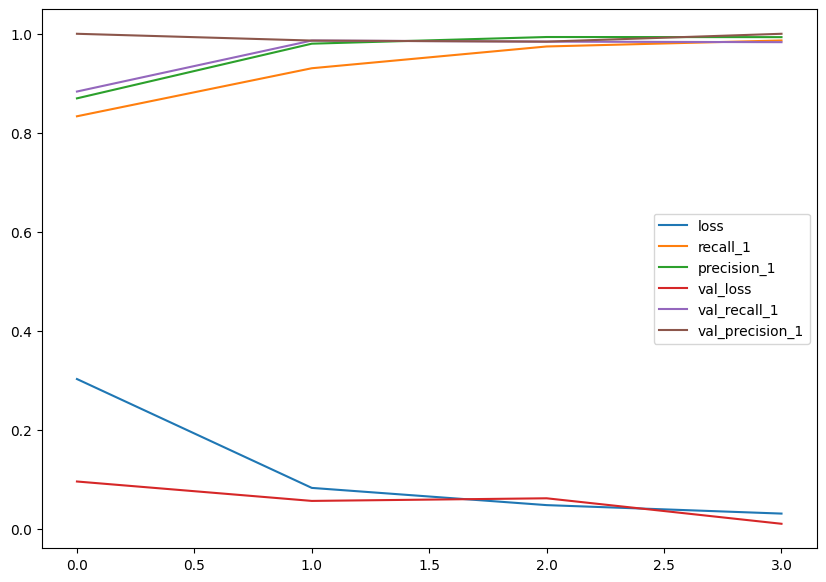

In [52]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10, 7))
plt.show()

## 8. Make a Prediction on a single Clip

### 8.1 Get One Batch and Make a prediction

In [39]:
X_test, y_test = test.as_numpy_iterator().next()

In [40]:
X_test.shape, y_test.shape

((16, 1491, 257, 1), (16,))

In [58]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 134ms/step


array([[1.1133306e-17],
       [9.9464454e-21],
       [1.6339016e-05],
       [4.6032028e-07],
       [5.0632491e-13],
       [1.0000000e+00],
       [1.0000000e+00],
       [8.0422051e-19],
       [9.9999821e-01],
       [1.0000000e+00],
       [2.5835308e-05],
       [1.0000000e+00],
       [1.6445082e-13],
       [1.0000000e+00],
       [3.0476754e-24],
       [7.0664376e-15]], dtype=float32)

### 8.2 convert Probability to Classes

In [60]:
y_preds = [1 if prediction > 0.5 else 0 for prediction in y_preds]
y_preds

[0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0]

In [61]:
y_test

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
      dtype=float32)

### 8.3 Save our model

In [62]:
DATA_PATH

'drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/data'

In [42]:
SAVE_PATH = os.path.join("drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/Models","CapuchinBird_Classification.h5")

In [ ]:
model.save(SAVE_PATH)

In [43]:
model = tf.keras.models.load_model(SAVE_PATH)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 1489, 255, 16)     160       
                                                                 
 conv2d_7 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 743, 126, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 741, 124, 10)      1450      
                                                                 
 conv2d_9 (Conv2D)           (None, 739, 122, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 369, 61, 10)      0         
 2D)                                                  

In [44]:
model.evaluate(test)

15/15 [==============================] - 11s 94ms/step - loss: 0.0035 - recall_1: 1.0000 - precision_1: 1.0000


[0.0035143503919243813, 1.0, 1.0]

## 9. Build Forest Parsing Functions

### 9.1 Load up MP3s

In [45]:
def load_mp3_16k_mono(filename):
  """
  Load a MP3 file and convert it to float tensor, resample to 16Khz single channel
  """

  res = tfio.audio.AudioIOTensor(filename)
  #Convert to tensor and combine channels

  tensor = res.to_tensor()
  tensor = tf.math.reduce_sum(tensor, axis = 1)/2

  # Extract sample rate and cast
  sample_rate = res.rate
  sample_rate = tf.cast(sample_rate,dtype = tf.int64)

  #Resample it to 16kHx
  wav = tfio.audio.resample(tensor, rate_in = sample_rate, rate_out = 16000)
  return wav

In [46]:
mp3 = os.path.join(DATA_PATH, "Forest Recordings", 'recording_00.mp3')

In [47]:
wav = load_mp3_16k_mono(mp3)

In [50]:
Audio(wav, rate = 16000)

Output hidden; open in https://colab.research.google.com to view.

In [51]:
# we will slice that audio file into section of each 48000 to make predictions

audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav,
                                                            sequence_length = 48000,
                                                            sequence_stride=48000,
                                                            batch_size = 1
                                                            )

In [52]:
samples, index = audio_slices.as_numpy_iterator().next()

In [53]:
len(audio_slices)

60

In [54]:
samples.shape

(1, 48000)

### 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [55]:
def preprocess_mp3(sample, index):
  sample = sample[0]
  zero_padding  = tf.zeros([48000] - tf.shape(sample), dtype = tf.float32)
  wav = tf.concat([zero_padding, sample], 0)
  spectrogram = tf.signal.stft(wav, frame_length = 320, frame_step = 32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis = 2)

  return spectrogram

### 9.3 Convert Longer Clips into Windows and Make predictions

In [56]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav,
                                                            sequence_length = 48000,
                                                            sequence_stride=48000,
                                                            batch_size = 1)

audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [63]:
y_preds = model.predict(audio_slices)
y_preds = [1 if prediction > 0.9 else 0 for prediction in y_preds]
y_preds

1/1 [==============================] - 1s 1s/step


[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [64]:
len(y_preds)

60

In [65]:
np.sum(y_preds)

6

### 9.4 Group Consecutive Detections

In [66]:
from itertools import groupby

In [67]:
y_preds = [key for key, group in groupby(y_preds)]
y_preds

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [69]:
call = tf.math.reduce_sum(y_preds)

## 10. make Predictions

### 10.1 Loop over all recording and make predictions

In [71]:
results = {}

for file in os.listdir(os.path.join(DATA_PATH, 'Forest Recordings')):
  FILEPATH = os.path.join(DATA_PATH, 'Forest Recordings', file)

  wav = load_mp3_16k_mono(FILEPATH)
  audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav,
                                                            sequence_length = 48000,
                                                            sequence_stride=48000,
                                                            batch_size = 1)
  audio_slices = audio_slices.map(preprocess_mp3)
  audio_slices = audio_slices.batch(64)

  y_preds = model.predict(audio_slices)

  results[file] = [1 if prediction > 0.9 else 0 for prediction in y_preds]

1/1 [==============================] - 1s 1s/step


### 10.2 Group Censecutive Detections

In [73]:
postprocessed = {}

for file, scores in results.items():
  postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()

postprocessed

{'recording_00.mp3': 5,
 'recording_01.mp3': 0,
 'recording_02.mp3': 0,
 'recording_03.mp3': 0,
 'recording_04.mp3': 4,
 'recording_05.mp3': 0,
 'recording_06.mp3': 5,
 'recording_07.mp3': 2,
 'recording_08.mp3': 20,
 'recording_09.mp3': 0,
 'recording_10.mp3': 5,
 'recording_11.mp3': 3,
 'recording_12.mp3': 1,
 'recording_14.mp3': 0,
 'recording_13.mp3': 0,
 'recording_15.mp3': 2,
 'recording_16.mp3': 5,
 'recording_17.mp3': 3,
 'recording_19.mp3': 0,
 'recording_18.mp3': 9,
 'recording_20.mp3': 0,
 'recording_21.mp3': 1,
 'recording_22.mp3': 2,
 'recording_23.mp3': 5,
 'recording_26.mp3': 2,
 'recording_25.mp3': 9,
 'recording_24.mp3': 0,
 'recording_27.mp3': 0,
 'recording_29.mp3': 0,
 'recording_28.mp3': 14,
 'recording_31.mp3': 1,
 'recording_30.mp3': 3,
 'recording_32.mp3': 2,
 'recording_33.mp3': 0,
 'recording_34.mp3': 4,
 'recording_35.mp3': 0,
 'recording_38.mp3': 1,
 'recording_37.mp3': 3,
 'recording_36.mp3': 0,
 'recording_42.mp3': 0,
 'recording_41.mp3': 0,
 'recording_39

## 11. Export Results

In [74]:
import csv

In [75]:
RESULTS_PATH = os.path.join("/content/drive/MyDrive/Machine_Learning_projects/Audio_Classification_Tensorflow/Results", 'capuchin_bird_results.csv')
with open(RESULTS_PATH,  'w', newline= '') as f:
  writer = csv.writer(f, delimiter = ',')
  writer.writerow(['recording', 'Capuchin_calls'])

  for key, value in postprocessed.items():
    writer.writerow([key, value])